# Skip-gram

Skip-gram version of word2vec described in https://arxiv.org/abs/1310.4546. Negative sampling was used for optimized learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap
from package2vec.utils.closest_packages import print_closest_packages
from package2vec.utils.co_mat import create_co_mat, print_common_packages

%matplotlib inline

In [2]:
# Get co-occurence matrix for comparison with learned vectors
file_path = 'data/processed/requirements_mc2.csv'
co_mat, word2id = create_co_mat(file_path)

100%|██████████| 39506/39506 [09:27<00:00, 69.58it/s]


## Training on whole dataset

**Whole dataset** - packages with only 1 dependency filtered out, packages occuring only once as dependency filtered out.

Below are embeddings learned by skipgram model with following parameters:

|Embedding dimension|Negative samples (used for negative sampling)|Optimizer|Learning rate|Min count|
| :---: | :---: | :---: | :---: | :---: |
| 100 | 5 | SparseAdam | 0.008 | 2 |



In [10]:
# Load learned vectors
learned_vectors = pd.read_csv('models/skipgram_whole_dataset/vectors.tsv', sep='\t', header=None)
learned_vectors = learned_vectors.values

# Fit learned vectors to 2 dimension using UMAP
reducer = umap.UMAP(n_neighbors=15)
embedding = reducer.fit_transform(learned_vectors)

Text(0.5, 1.0, 'UMAP projection of learned vectors')

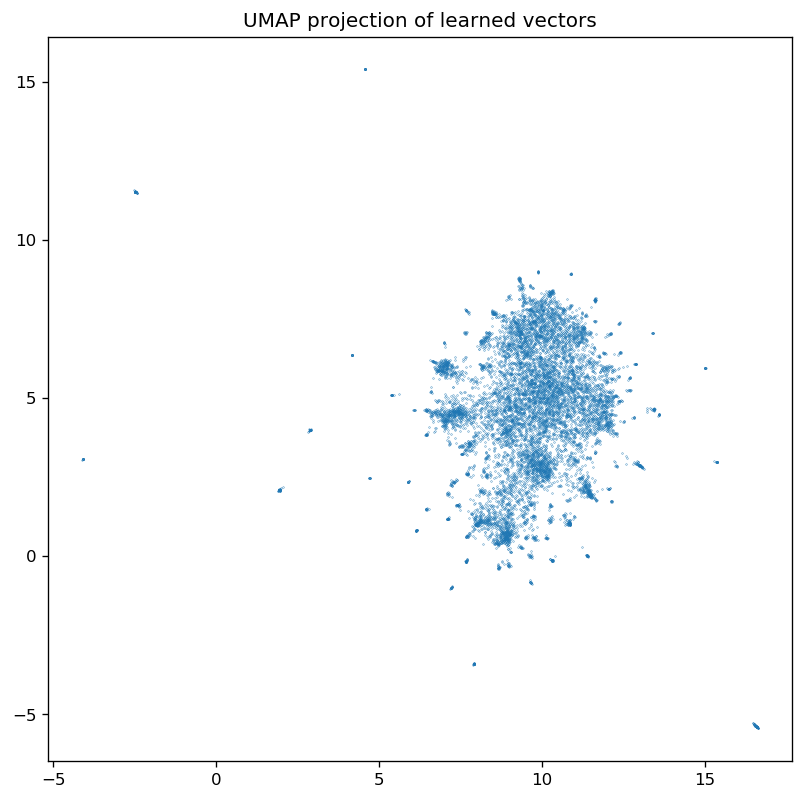

In [11]:
# Plot embedded learned vectors
plt.figure(figsize=(8, 8), dpi=120)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s = 0.05)
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of learned vectors')

Looking at the plot above, we can see several clusters. Those are formed by packages occuring most together in the dataset.

---

Comparing euclidean distances in learned 100 dimensional embedding and co-occurence (using co-occurence matrix), we can see some overlap between most co-occuring packages and closest packages in embedded space.

In [12]:
file_path = 'models/skipgram_whole_dataset/'
ret = print_closest_packages(file_path = file_path, word = 'numpy', k = 5)
print()
print_common_packages(co_mat, word2id, 'numpy', n=5)

5 closest packages to numpy:
---
scikit-learn
tqdm
matplotlib
pyyaml
pandas

5 packages co-occuring most with numpy:
---
scipy
pandas
matplotlib
pytest
scikit-learn


In [13]:
ret = print_closest_packages(file_path = file_path, word = 'torch', k = 5)
print()
print_common_packages(co_mat, word2id, 'torch', n=5)

5 closest packages to torch:
---
torchvision
scikit-learn
joblib
tqdm
seaborn

5 packages co-occuring most with torch:
---
numpy
tqdm
torchvision
scipy
matplotlib


In [14]:
ret = print_closest_packages(file_path = file_path, word = 'tensorflow', k = 5)
print()
print_common_packages(co_mat, word2id, 'tensorflow', n=5)

5 closest packages to tensorflow:
---
keras
tensorflow-gpu
h5py
scikit-learn
matplotlib

5 packages co-occuring most with tensorflow:
---
numpy
keras
matplotlib
scipy
pandas


In [15]:
ret = print_closest_packages(file_path = file_path, word = 'pandas', k = 5)
print()
print_common_packages(co_mat, word2id, 'pandas', n=5)

5 closest packages to pandas:
---
matplotlib
scikit-learn
scipy
seaborn
pyyaml

5 packages co-occuring most with pandas:
---
numpy
scipy
matplotlib
requests
scikit-learn


---

## Training on filtered data

There is large number of packages occuring only a few times as dependency. Filtering those out might create dataset representing the relations of packages better. 

All packages occuring less than **10** times as dependency in the dataset were filtered out.

Model was trained with following configurations.

|Embedding dimension|Negative samples (used for negative sampling)|Optimizer|Learning rate|Min count|
| :---: | :---: | :---: | :---: | :---: |
| 100 | 5 | SparseAdam | 0.008 | 10 |


When using bigger value of min_count, the number of unique packages in dataset (size vocabulary) is getting quite small (**1251** for min_count = 20 and **704** for min_count = 40).

In [26]:
# Load learned vectors
learned_vectors = pd.read_csv('models/skipgram_min_count10/vectors.tsv', sep='\t', header=None)
learned_vectors = learned_vectors.values

# Fit learned vectors to 2 dimension using UMAP
reducer = umap.UMAP(n_neighbors=10)
embedding = reducer.fit_transform(learned_vectors)

Text(0.5, 1.0, 'UMAP projection of learned vectors')

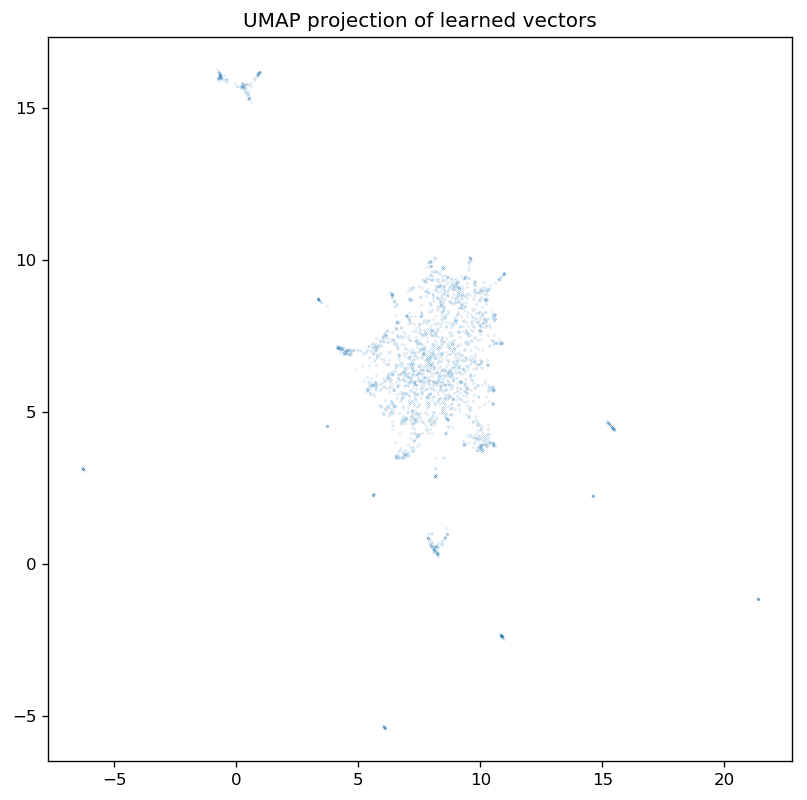

In [27]:
# Plot embedded learned vectors
plt.figure(figsize=(8, 8), dpi=120)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s = 0.01)
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of learned vectors')

Some clusters are forming again. The plot looks similar to the previous one. There are less 'noise' points outside of any cluster.

---

Again, we can see an overlap between most co-occuring packages and closest packages in embedded space.

In [28]:
file_path = 'models/skipgram_min_count10/'
ret = print_closest_packages(file_path = file_path, word = 'numpy', k = 5)
print()
print_common_packages(co_mat, word2id, 'numpy', n=5)

5 closest packages to numpy:
---
scikit-learn
joblib
matplotlib
pyparsing
seaborn

5 packages co-occuring most with numpy:
---
scipy
pandas
matplotlib
pytest
scikit-learn


In [29]:
ret = print_closest_packages(file_path = file_path, word = 'torch', k = 5)
print()
print_common_packages(co_mat, word2id, 'torch', n=5)

5 closest packages to torch:
---
joblib
torchvision
scikit-learn
sklearn
jupyter

5 packages co-occuring most with torch:
---
numpy
tqdm
torchvision
scipy
matplotlib


In [30]:
ret = print_closest_packages(file_path = file_path, word = 'tensorflow', k = 5)
print()
print_common_packages(co_mat, word2id, 'tensorflow', n=5)

5 closest packages to tensorflow:
---
keras
absl-py
h5py
protobuf
matplotlib

5 packages co-occuring most with tensorflow:
---
numpy
keras
matplotlib
scipy
pandas


In [31]:
ret = print_closest_packages(file_path = file_path, word = 'pandas', k = 5)
print()
print_common_packages(co_mat, word2id, 'pandas', n=5)

5 closest packages to pandas:
---
scikit-learn
joblib
scipy
matplotlib
seaborn

5 packages co-occuring most with pandas:
---
numpy
scipy
matplotlib
requests
scikit-learn
